In [2]:
# importar bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import xgboost as xgb
import lightgbm as lgbm
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [3]:
# abrir dataset

#dataset = pd.read_csv('D:\\archive\\features_kidney_cancer_VGG16.csv')
dataset = pd.read_csv('C:/Users/danie/Desktop/Projeto-SI2/DatasetFeatures_VGG16_224x224/features_breast_cancer_VGG16.csv') 

In [4]:
# separar as colunas de dados e label

colunas_dados = []
for column in dataset.columns:
    if column != 'label':
        colunas_dados.append(column)
    else: 
        print("Achou")

X_full = dataset[colunas_dados]
Y_full = dataset['label']
X_full = np.array(X_full)
Y_full = np.array(Y_full)
np.random.shuffle(X_full)
np.random.shuffle(Y_full)

del dataset




Achou


In [5]:
# Separa em conjunto de teste e treino
x_train, x_test, y_train, y_test = train_test_split(X_full,Y_full,random_state=42,test_size=0.3)

del X_full, Y_full


Accuracy:  0.486


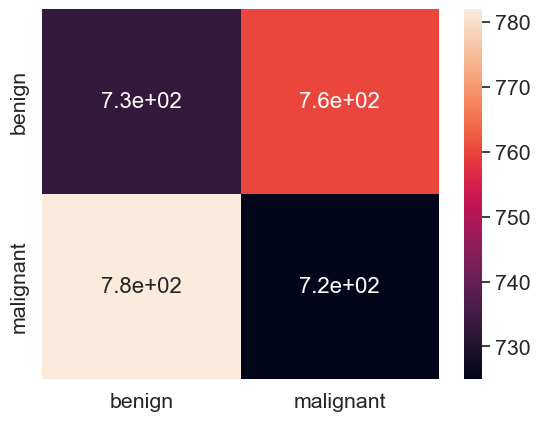

In [6]:
# aplicar SVC
modelSVM = svm.SVC()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['benign','malignant'], yticklabels=['benign','malignant']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

Accuracy:  0.507


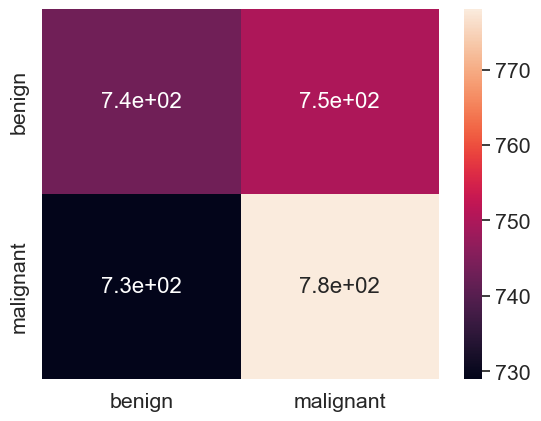

In [7]:
# aplicar LSVC
modelSVM = svm.LinearSVC()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['benign','malignant'], yticklabels=['benign','malignant']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

Accuracy:  0.498


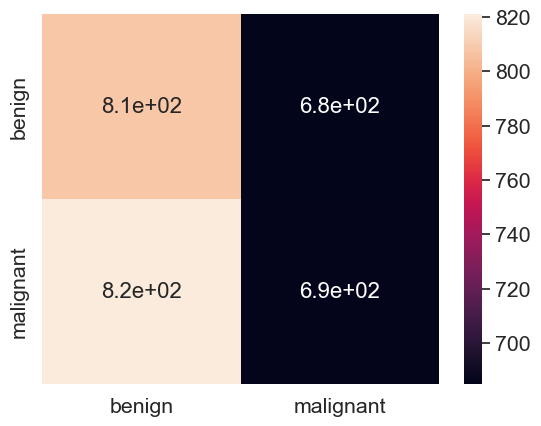

In [8]:
# aplicar RF
modelSVM = RandomForestClassifier()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['benign','malignant'], yticklabels=['benign','malignant']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

[LightGBM] [Info] Number of positive: 3493, number of negative: 3507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.885529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3481984
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 24305
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499000 -> initscore=-0.004000
[LightGBM] [Info] Start training from score -0.004000
Accuracy:  0.486


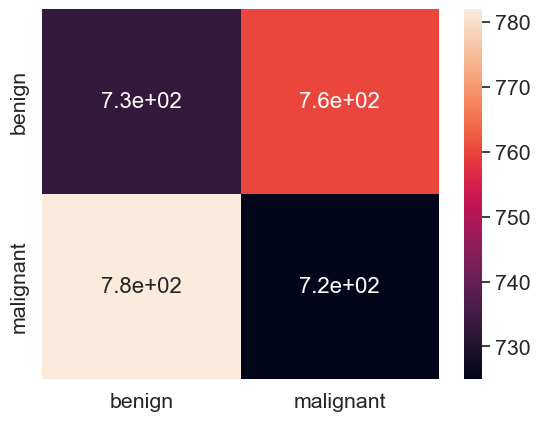

In [9]:
# aplicar LGBM
modelSVM = lgbm.LGBMClassifier()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['benign','malignant'], yticklabels=['benign','malignant']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

Accuracy:  0.507


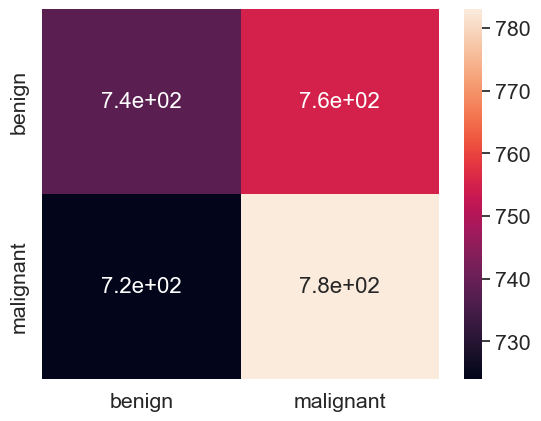

In [10]:
# aplicar xgb
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test_encoded = le.transform(y_test)
le.fit(y_train)
y_train_encoded = le.transform(y_train)
modelSVM = xgb.XGBClassifier()
modelSVM.fit(x_train,y_train_encoded)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test_encoded, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['benign','malignant'], yticklabels=['benign','malignant']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)